In [84]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%pylab inline
plt.rcParams['figure.figsize']=10,7.5
plt.rcParams['axes.grid']=True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [85]:
from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [93]:
%cd D:\E DRIVE\PERSONAL\analytixlab\PYTHON\Class 11\Class 11 & 12 files

D:\E DRIVE\PERSONAL\analytixlab\PYTHON\Class 11\Class 11 & 12 files


In [94]:
car_sales=pd.read_csv("car_sales.csv")
car_sales.head(3)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN


In [95]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer           157 non-null object
Model                  157 non-null object
Sales_in_thousands     157 non-null float64
__year_resale_value    121 non-null float64
Vehicle_type           157 non-null object
Price_in_thousands     155 non-null float64
Engine_size            156 non-null float64
Horsepower             156 non-null float64
Wheelbase              156 non-null float64
Width                  156 non-null float64
Length                 156 non-null float64
Curb_weight            155 non-null float64
Fuel_capacity          156 non-null float64
Fuel_efficiency        154 non-null float64
Latest_Launch          157 non-null object
Power_perf_factor      155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [96]:
car_sales.columns

Index([u'Manufacturer', u'Model', u'Sales_in_thousands',
       u'__year_resale_value', u'Vehicle_type', u'Price_in_thousands',
       u'Engine_size', u'Horsepower', u'Wheelbase', u'Width', u'Length',
       u'Curb_weight', u'Fuel_capacity', u'Fuel_efficiency', u'Latest_Launch',
       u'Power_perf_factor'],
      dtype='object')

### Method 1:

#### Separate Numerical and Categorical variables:

In [97]:
numeric_var=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['float64','int64','float32','int32']]
cat_var=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['object']]
print(numeric_var)
print(cat_var)

['Curb_weight', 'Engine_size', 'Fuel_efficiency', 'Price_in_thousands', 'Power_perf_factor', '__year_resale_value', 'Fuel_capacity', 'Wheelbase', 'Width', 'Length', 'Horsepower', 'Sales_in_thousands']
['Latest_Launch', 'Model', 'Vehicle_type', 'Manufacturer']


#### DataFrame for Categorical and Numerical :

In [98]:
#DataFrame for Numerical and Categorical variable:
car_sales_num=car_sales[numeric_var]
car_sales_cat=car_sales[cat_var]


In [99]:
car_sales_num.head(2)

,Curb_weight,Engine_size,Fuel_efficiency,Price_in_thousands,Power_perf_factor,__year_resale_value,Fuel_capacity,Wheelbase,Width,Length,Horsepower,Sales_in_thousands
0,2.639,1.8,28.0,21.5,58.280150,16.360,13.2,101.2,67.3,172.4,140.0,16.919
1,3.517,3.2,25.0,28.4,91.370778,19.875,17.2,108.1,70.3,192.9,225.0,39.384


In [100]:
car_sales_cat.head(2)

,Latest_Launch,Model,Vehicle_type,Manufacturer
0,2/2/2012,Integra,Passenger,Acura
1,6/3/2011,TL,Passenger,Acura


#### Creating Summary

In [101]:
#Creating Data Audit Report for Numerical
#Use general function that returns multiple values:
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),x.dropna().quantile(.01),
                     x.dropna().quantile(.05),x.dropna().quantile(.10),x.dropna().quantile(.25),x.dropna().quantile(.50),
                     x.dropna().quantile(.75),x.dropna().quantile(.90),x.dropna().quantile(.95),x.dropna().quantile(.99),
                     x.max()],index=['N','NMISS','SUM','MEAN','MEDIAN','STD','VAR','MIN','P1','P5','P10','P25','P50','P75',
                                    'P90','P95','P99','MAX'])
num_summary=car_sales_num.apply(lambda x:var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Fuel_efficiency,154.0,3.0,3672.000000,23.844156,24.000000,4.282706,18.341567,15.000000,15.00000,16.650000,18.300000,21.000000,24.000000,26.000000,28.700000,31.000000,33.000000,45.000000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Power_perf_factor,155.0,2.0,11941.756636,77.043591,72.030917,25.142664,632.153558,23.276272,38.46192,46.203997,48.447741,60.407707,72.030917,89.414878,108.499252,125.091513,141.119461,188.144323
__year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000


In [102]:
num_summary.to_csv('num_summary.csv')

In [103]:
#Creating Data Audit Report for Categorical
def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts()],index=['N','NMISS','ColumnNames'])
cate_summary=car_sales_cat.apply(lambda x:cat_summary(x))
cate_summary

,Latest_Launch,Model,Vehicle_type,Manufacturer
N,157,157,157,157
NMISS,0,0,0,0
ColumnNames,1/4/2012 2 4/24/2011 2 1/24/2011 ...,Neon 2 S40 1 Intrigue...,Passenger 116 Car 41 Name: Vehicl...,Ford 11 Dodge 11 Chevrolet ...


### Method 2

### Step 1

### Pandas Profiling:

In [104]:
pandas_profiling.ProfileReport(car_sales)

Number of variables,16
Number of observations,157
Total Missing (%),0.0%
Total size in memory,19.7 KiB
Average record size in memory,128.0 B
Numeric,10
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


### Step 2

#### Handling Outliers

In [105]:
car_sales.columns

Index([u'Manufacturer', u'Model', u'Sales_in_thousands',
       u'__year_resale_value', u'Vehicle_type', u'Price_in_thousands',
       u'Engine_size', u'Horsepower', u'Wheelbase', u'Width', u'Length',
       u'Curb_weight', u'Fuel_capacity', u'Fuel_efficiency', u'Latest_Launch',
       u'Power_perf_factor'],
      dtype='object')

In [106]:
#Handling Outliers:
#Method 1
car_sales['Sales_in_thousands']=car_sales['Sales_in_thousands'].clip_upper(car_sales['Sales_in_thousands'].quantile(.99))
car_sales['Sales_in_thousands']=car_sales['Sales_in_thousands'].clip_lower(car_sales['Sales_in_thousands'].quantile(.01))


In [107]:
car_summary=car_sales_num.apply(lambda x:var_summary(x)).T
car_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Fuel_efficiency,154.0,3.0,3672.000000,23.844156,24.000000,4.282706,18.341567,15.000000,15.00000,16.650000,18.300000,21.000000,24.000000,26.000000,28.700000,31.000000,33.000000,45.000000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Power_perf_factor,155.0,2.0,11941.756636,77.043591,72.030917,25.142664,632.153558,23.276272,38.46192,46.203997,48.447741,60.407707,72.030917,89.414878,108.499252,125.091513,141.119461,188.144323
__year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000


In [108]:
#Handling Outliers:
#Method 2
def outlier_capping(x):
    x=x.clip_upper(x.quantile(.99))
    x=x.clip_lower(x.quantile(.01))
    return x
car_sales_num=car_sales_num.apply(lambda x:outlier_capping(x))

In [109]:
car_summary=car_sales_num.apply(lambda x:var_summary(x)).T
car_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Curb_weight,155.0,2.0,523.770160,3.379162,3.342000,0.621764,0.386591,2.24540,2.247884,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.394693,5.396680
Engine_size,156.0,1.0,475.810000,3.050064,3.000000,0.982279,0.964871,1.55500,1.579750,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,5.700000
Fuel_efficiency,154.0,3.0,3660.000000,23.766234,24.000000,3.994755,15.958068,15.00000,15.000000,16.650000,18.300000,21.000000,24.000000,26.000000,28.700000,31.000000,33.000000,33.000000
Price_in_thousands,155.0,2.0,4235.955480,27.328745,22.799000,14.063970,197.795238,10.23144,10.476362,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,76.584508,78.479800
Power_perf_factor,155.0,2.0,11911.685368,76.849583,72.030917,23.844968,568.582480,38.46192,39.285152,46.203997,48.447741,60.407707,72.030917,89.414878,108.499252,125.091513,141.109484,141.119461
__year_resale_value,121.0,36.0,2180.421000,18.020008,14.180000,11.181335,125.022260,6.17300,6.423400,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,59.896000,60.220000
Fuel_capacity,156.0,1.0,2799.900000,17.948077,17.200000,3.819854,14.591287,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.405000,30.900000
Wheelbase,156.0,1.0,16760.100000,107.436538,107.000000,7.424295,55.120156,92.87500,92.998750,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,132.518750,134.375000
Width,156.0,1.0,11102.450000,71.169551,70.550000,3.390339,11.494400,66.08500,66.258250,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.140500,79.190000
Length,156.0,1.0,29223.940000,187.332949,187.900000,13.120350,172.143594,154.91500,156.226750,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,217.102250,219.305000


### Step 3

### Handling Missing Value

In [110]:
# Method 1
car_sales['Curb_weight']=car_sales['Curb_weight'].fillna(car_sales['Curb_weight'].mean())

In [111]:
car_summary=car_sales_num.apply(lambda x:var_summary(x)).T
car_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Curb_weight,155.0,2.0,523.770160,3.379162,3.342000,0.621764,0.386591,2.24540,2.247884,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.394693,5.396680
Engine_size,156.0,1.0,475.810000,3.050064,3.000000,0.982279,0.964871,1.55500,1.579750,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,5.700000
Fuel_efficiency,154.0,3.0,3660.000000,23.766234,24.000000,3.994755,15.958068,15.00000,15.000000,16.650000,18.300000,21.000000,24.000000,26.000000,28.700000,31.000000,33.000000,33.000000
Price_in_thousands,155.0,2.0,4235.955480,27.328745,22.799000,14.063970,197.795238,10.23144,10.476362,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,76.584508,78.479800
Power_perf_factor,155.0,2.0,11911.685368,76.849583,72.030917,23.844968,568.582480,38.46192,39.285152,46.203997,48.447741,60.407707,72.030917,89.414878,108.499252,125.091513,141.109484,141.119461
__year_resale_value,121.0,36.0,2180.421000,18.020008,14.180000,11.181335,125.022260,6.17300,6.423400,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,59.896000,60.220000
Fuel_capacity,156.0,1.0,2799.900000,17.948077,17.200000,3.819854,14.591287,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.405000,30.900000
Wheelbase,156.0,1.0,16760.100000,107.436538,107.000000,7.424295,55.120156,92.87500,92.998750,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,132.518750,134.375000
Width,156.0,1.0,11102.450000,71.169551,70.550000,3.390339,11.494400,66.08500,66.258250,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.140500,79.190000
Length,156.0,1.0,29223.940000,187.332949,187.900000,13.120350,172.143594,154.91500,156.226750,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,217.102250,219.305000


In [112]:
#Method 2
def Missing_imputation(x):
    x=x.fillna(x.mean())
    return x
car_sales_num=car_sales_num.apply(lambda x:Missing_imputation(x))


In [113]:
car_summary=car_sales_num.apply(lambda x:var_summary(x)).T
car_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Curb_weight,157.0,0.0,530.528485,3.379162,3.368000,0.617766,0.381634,2.24540,2.247976,2.424000,2.612800,2.975000,3.368000,3.778000,4.11740,4.388400,5.394619,5.396680
Engine_size,157.0,0.0,478.860064,3.050064,3.000000,0.979125,0.958686,1.55500,1.580200,1.800000,1.960000,2.300000,3.000000,3.500000,4.60000,4.760000,5.700000,5.700000
Fuel_efficiency,157.0,0.0,3731.298701,23.766234,24.000000,3.956157,15.651182,15.00000,15.000000,16.800000,18.600000,21.000000,24.000000,26.000000,28.40000,31.000000,33.000000,33.000000
Price_in_thousands,157.0,0.0,4290.612970,27.328745,23.400000,13.973525,195.259402,10.23144,10.485434,12.491000,13.976200,18.145000,23.400000,31.930000,43.78800,55.225000,76.514312,78.479800
Power_perf_factor,157.0,0.0,12065.384534,76.849583,72.290355,23.691622,561.292961,38.46192,39.315643,46.257114,48.522793,60.727447,72.290355,89.401935,107.99432,125.065461,141.109114,141.119461
__year_resale_value,157.0,0.0,2829.141298,18.020008,17.710000,9.806680,96.170969,6.17300,6.874120,8.425000,9.710000,12.545000,17.710000,18.140000,27.02500,39.275000,59.312800,60.220000
Fuel_capacity,157.0,0.0,2817.848077,17.948077,17.200000,3.807591,14.497753,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.500000,23.20000,25.400000,30.396000,30.900000
Wheelbase,157.0,0.0,16867.536538,107.436538,107.000000,7.400461,54.766822,92.87500,93.001000,95.920000,98.700000,103.000000,107.000000,112.200000,115.46000,119.200000,132.485000,134.375000
Width,157.0,0.0,11173.619551,71.169551,70.600000,3.379455,11.420718,66.08500,66.261400,66.500000,66.900000,68.400000,70.600000,73.400000,76.18000,78.200000,79.139600,79.190000
Length,157.0,0.0,29411.272949,187.332949,187.800000,13.078230,171.040110,154.91500,156.250600,163.700000,173.120000,177.600000,187.800000,196.100000,203.34000,208.500000,217.062200,219.305000


### Step 4:

### Handling Categorical Variable:

In [114]:
#Create Dummies
col_dummies=pd.get_dummies(car_sales['Vehicle_type'],prefix='Vehicle_type')
col_dummies.head(3)

,Vehicle_type_Car,Vehicle_type_Passenger
0,0,1
1,0,1
2,0,1


In [115]:
col_dummies.drop(col_dummies.columns[0],axis=1,inplace=True)

In [116]:
col_dummies.head(3)

,Vehicle_type_Passenger
0,1
1,1
2,1


In [117]:
car_sales_cat.head(3)

,Latest_Launch,Model,Vehicle_type,Manufacturer
0,2/2/2012,Integra,Passenger,Acura
1,6/3/2011,TL,Passenger,Acura
2,1/4/2012,CL,Passenger,Acura


In [118]:
car_sales_cat=pd.concat([car_sales['Vehicle_type'],col_dummies],axis=1)

In [119]:
car_sales_cat.head(3)

,Vehicle_type,Vehicle_type_Passenger
0,Passenger,1
1,Passenger,1
2,Passenger,1


In [120]:
#Method 2
# An utility function to create dummy variables
def create_dummy(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname)
    col_dummies.drop(col_dummies.columns[0],axis=1,inplace=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [121]:
#For C-Feature in Categorical Features:
car_sales_cat=car_sales[['Manufacturer','Vehicle_type']]
for c_feature in ['Manufacturer','Vehicle_type']:
    car_sales_cat[c_feature]=car_sales_cat[c_feature].astype('category')
    car_sales_cat=create_dummy(car_sales_cat,c_feature)
    

C:\Users\satya\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [123]:
car_sales_num

,Curb_weight,Engine_size,Fuel_efficiency,Price_in_thousands,Power_perf_factor,__year_resale_value,Fuel_capacity,Wheelbase,Width,Length,Horsepower,Sales_in_thousands
0,2.639000,1.800,28.0,21.500000,58.280150,16.360000,13.2,101.2,67.300,172.400,140.00,16.919
1,3.517000,3.200,25.0,28.400000,91.370778,19.875000,17.2,108.1,70.300,192.900,225.00,39.384
2,3.470000,3.200,26.0,27.328745,76.849583,18.225000,17.2,106.9,70.600,192.000,225.00,14.114
3,3.850000,3.500,22.0,42.000000,91.389779,29.725000,18.0,114.6,71.400,196.600,210.00,8.588
4,2.998000,1.800,27.0,23.990000,62.777639,22.255000,16.4,102.6,68.200,178.000,150.00,20.397
5,3.561000,2.800,22.0,33.950000,84.565105,23.555000,18.5,108.7,76.100,192.000,200.00,18.780
6,3.902000,4.200,21.0,62.000000,134.656858,39.000000,23.7,113.0,74.000,198.200,310.00,1.380
7,3.179000,2.500,26.0,26.990000,71.191207,18.020008,16.6,107.3,68.400,176.000,170.00,19.747
8,3.197000,2.800,24.0,33.400000,81.877069,28.675000,16.6,107.3,68.500,176.000,193.00,9.231
9,3.472000,2.800,25.0,38.900000,83.998724,36.125000,18.5,111.4,70.900,188.000,193.00,17.527


In [124]:
#PUT THEM BACK TOGETHER Numerical and categorical
car_sales_new=pd.concat([car_sales_num,car_sales_cat],axis=1)


In [125]:
car_sales_new.head(3)

,Curb_weight,Engine_size,Fuel_efficiency,Price_in_thousands,Power_perf_factor,__year_resale_value,Fuel_capacity,Wheelbase,Width,Length,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,2.639,1.8,28.0,21.500000,58.280150,16.360,13.2,101.2,67.3,172.4,...,0,0,0,0,0,0,0,0,0,1
1,3.517,3.2,25.0,28.400000,91.370778,19.875,17.2,108.1,70.3,192.9,...,0,0,0,0,0,0,0,0,0,1
2,3.470,3.2,26.0,27.328745,76.849583,18.225,17.2,106.9,70.6,192.0,...,0,0,0,0,0,0,0,0,0,1


In [126]:
pandas_profiling.ProfileReport(car_sales_new)

Number of variables,42
Number of observations,157
Total Missing (%),0.0%
Total size in memory,19.4 KiB
Average record size in memory,126.0 B
Numeric,10
Categorical,0
Boolean,30
Date,0
Text (Unique),0
Rejected,2


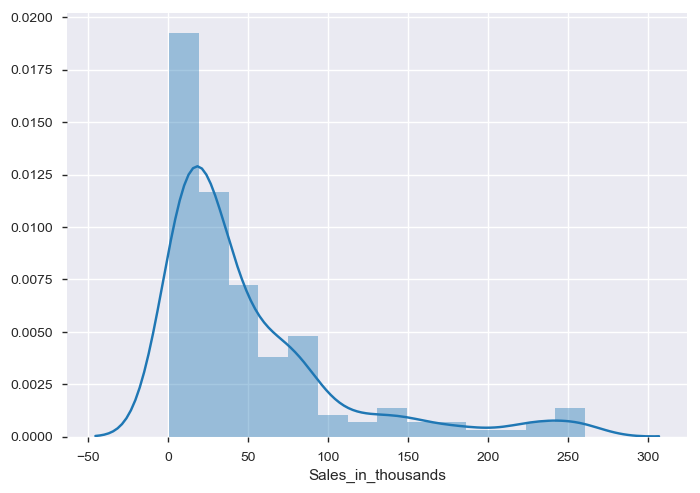

In [127]:
#Exploring of data
#Distribution of Variables
sns.distplot(car_sales_new.Sales_in_thousands)

In [128]:
# The above curve is not normal. Toconvert it normal take a log,exp etc
car_sales_new['Sales_in_thousands_new']=np.log(car_sales_new['Sales_in_thousands']+1) 

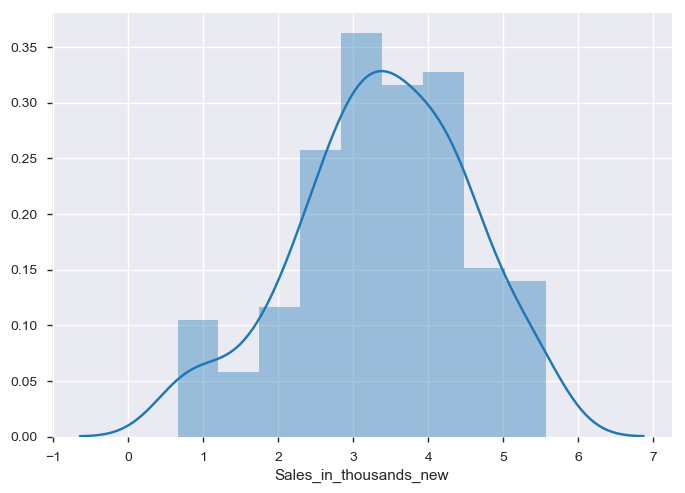

In [130]:
sns.distplot(car_sales_new.Sales_in_thousands_new)

In [132]:
car_sales_new.head()

,Curb_weight,Engine_size,Fuel_efficiency,Price_in_thousands,Power_perf_factor,__year_resale_value,Fuel_capacity,Wheelbase,Width,Length,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,Sales_in_thousands_new
0,2.639,1.8,28.0,21.500000,58.280150,16.360,13.2,101.2,67.3,172.4,...,0,0,0,0,0,0,0,0,1,2.885862
1,3.517,3.2,25.0,28.400000,91.370778,19.875,17.2,108.1,70.3,192.9,...,0,0,0,0,0,0,0,0,1,3.698434
2,3.470,3.2,26.0,27.328745,76.849583,18.225,17.2,106.9,70.6,192.0,...,0,0,0,0,0,0,0,0,1,2.715621
3,3.850,3.5,22.0,42.000000,91.389779,29.725,18.0,114.6,71.4,196.6,...,0,0,0,0,0,0,0,0,1,2.260512
4,2.998,1.8,27.0,23.990000,62.777639,22.255,16.4,102.6,68.2,178.0,...,0,0,0,0,0,0,0,0,1,3.063251


In [133]:
#Drop old non distributed variables
car_sales_new=car_sales_new.drop(['Sales_in_thousands'], axis=True)

In [134]:
car_sales_new.head()

,Curb_weight,Engine_size,Fuel_efficiency,Price_in_thousands,Power_perf_factor,__year_resale_value,Fuel_capacity,Wheelbase,Width,Length,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,Sales_in_thousands_new
0,2.639,1.8,28.0,21.500000,58.280150,16.360,13.2,101.2,67.3,172.4,...,0,0,0,0,0,0,0,0,1,2.885862
1,3.517,3.2,25.0,28.400000,91.370778,19.875,17.2,108.1,70.3,192.9,...,0,0,0,0,0,0,0,0,1,3.698434
2,3.470,3.2,26.0,27.328745,76.849583,18.225,17.2,106.9,70.6,192.0,...,0,0,0,0,0,0,0,0,1,2.715621
3,3.850,3.5,22.0,42.000000,91.389779,29.725,18.0,114.6,71.4,196.6,...,0,0,0,0,0,0,0,0,1,2.260512
4,2.998,1.8,27.0,23.990000,62.777639,22.255,16.4,102.6,68.2,178.0,...,0,0,0,0,0,0,0,0,1,3.063251


In [148]:
car_sales_new.columns

Index([u'Curb_weight', u'Engine_size', u'Fuel_efficiency',
       u'Price_in_thousands', u'Power_perf_factor', u'__year_resale_value',
       u'Fuel_capacity', u'Wheelbase', u'Width', u'Length', u'Horsepower',
       u'Manufacturer_Audi', u'Manufacturer_BMW', u'Manufacturer_Buick',
       u'Manufacturer_Cadillac', u'Manufacturer_Chevrolet',
       u'Manufacturer_Chrysler', u'Manufacturer_Dodge', u'Manufacturer_Ford',
       u'Manufacturer_Honda', u'Manufacturer_Hyundai',
       u'Manufacturer_Infiniti', u'Manufacturer_Jaguar', u'Manufacturer_Jeep',
       u'Manufacturer_Lexus', u'Manufacturer_Lincoln',
       u'Manufacturer_Mercedes-B', u'Manufacturer_Mercury',
       u'Manufacturer_Mitsubishi', u'Manufacturer_Nissan',
       u'Manufacturer_Oldsmobile', u'Manufacturer_Plymouth',
       u'Manufacturer_Pontiac', u'Manufacturer_Porsche', u'Manufacturer_Saab',
       u'Manufacturer_Saturn', u'Manufacturer_Subaru', u'Manufacturer_Toyota',
       u'Manufacturer_Volkswagen', u'Manufacturer_Vo

In [154]:
#Create a correlation matrix [its range from -1 to +1]
car_sales_new.corr().tail()


,Curb_weight,Engine_size,Fuel_efficiency,Price_in_thousands,Power_perf_factor,__year_resale_value,Fuel_capacity,Wheelbase,Width,Length,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,Sales_in_thousands_new
Manufacturer_Toyota,-0.070768,-0.108099,0.091046,-0.094643,-0.113392,-3.055220e-02,-0.011787,-0.094079,-0.115710,-0.103610,...,-0.049156,-0.034418,-0.028012,-0.044725,-0.028012,1.000000,-0.049156,-0.049156,-0.165280,0.149354
Manufacturer_Volkswagen,-0.161960,-0.221271,0.121336,-0.137820,-0.225973,-6.244961e-02,-0.170589,-0.203652,-0.187554,-0.304533,...,-0.039735,-0.027822,-0.022643,-0.036154,-0.022643,-0.049156,1.000000,-0.039735,0.118509,-0.039660
Manufacturer_Volvo,-0.030589,-0.153192,0.037090,0.051585,0.000962,5.386266e-17,-0.006026,-0.085656,-0.094848,-0.059118,...,-0.039735,-0.027822,-0.022643,-0.036154,-0.022643,-0.049156,-0.039735,1.000000,0.118509,-0.164977
Vehicle_type_Passenger,-0.519405,-0.279272,0.598061,0.042006,-0.003672,7.663782e-02,-0.594758,-0.383084,-0.241472,-0.129701,...,0.042875,0.082978,0.067532,0.107827,-0.061767,-0.165280,0.118509,0.118509,1.000000,-0.272925
Sales_in_thousands_new,-0.056208,-0.109526,0.128033,-0.566486,-0.438225,-4.702387e-01,-0.017765,0.269627,0.045104,0.207778,...,0.099384,-0.242225,-0.092695,-0.040121,0.031315,0.149354,-0.039660,-0.164977,-0.272925,1.000000


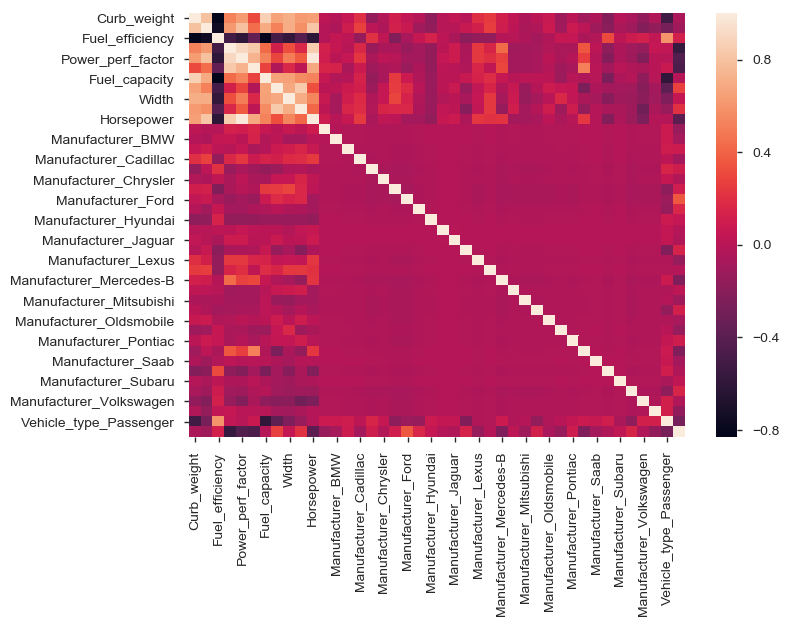

In [155]:
#Vizualize correlation matrix in seaborn using heat map
sns.heatmap(car_sales_new.corr())

In [160]:
cs=car_sales_new.corr().iloc[-1,:]
cs.to_csv('car_sales_new_corr.csv')

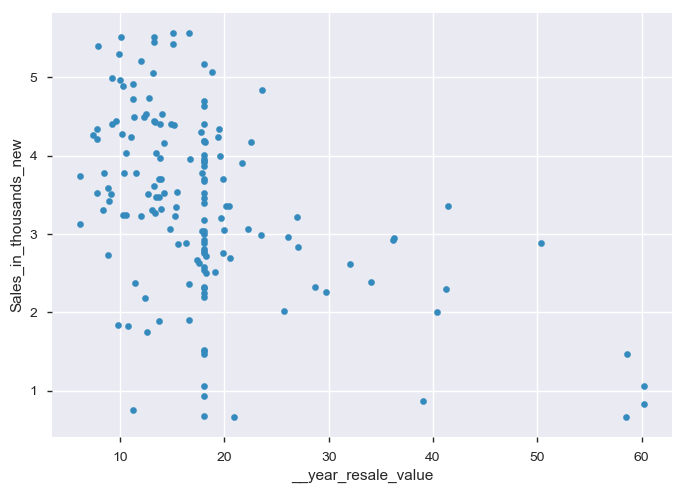

In [164]:
car_sales_new.plot(kind='scatter',x='__year_resale_value',y='Sales_in_thousands_new',alpha=1)

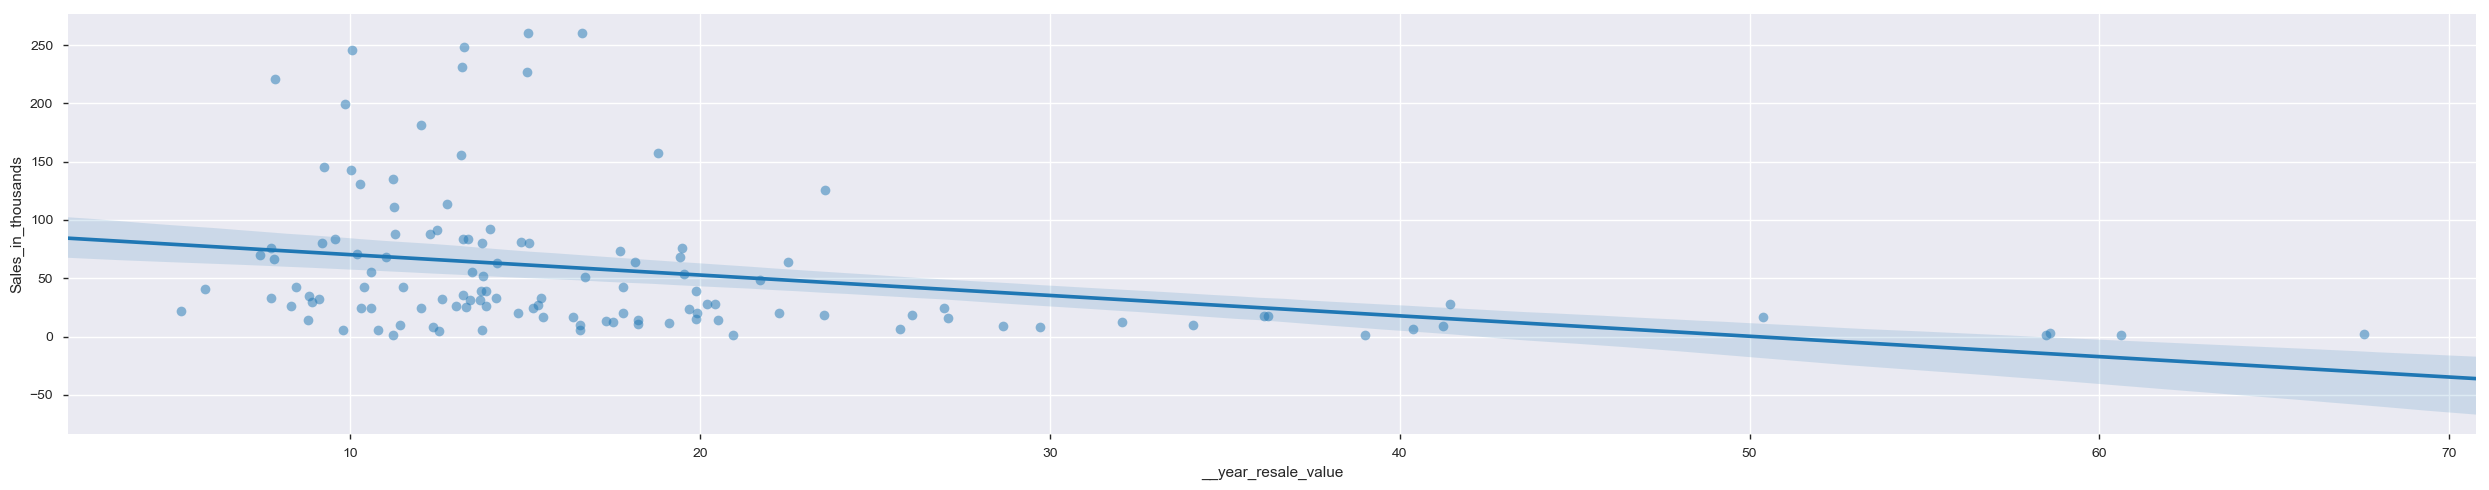

In [182]:
#car_sales_new.plot(kind='scatter',x='Engine_size',y='Sales_in_thousands_new',alpha=1)
sns.lmplot(x='__year_resale_value',y='Sales_in_thousands',data=car_sales, aspect=5,scatter_kws={'alpha':.5})

In [180]:
sns.lmplot?

### Split the Data train test split

In [183]:
#Split the data into training and testing:
#Feature_columns means only X variables
feature_columns=car_sales_new.columns.difference(['Sales_in_thousands_new'])
feature_columns

Index([u'Curb_weight', u'Engine_size', u'Fuel_capacity', u'Fuel_efficiency',
       u'Horsepower', u'Length', u'Manufacturer_Audi', u'Manufacturer_BMW',
       u'Manufacturer_Buick', u'Manufacturer_Cadillac',
       u'Manufacturer_Chevrolet', u'Manufacturer_Chrysler',
       u'Manufacturer_Dodge', u'Manufacturer_Ford', u'Manufacturer_Honda',
       u'Manufacturer_Hyundai', u'Manufacturer_Infiniti',
       u'Manufacturer_Jaguar', u'Manufacturer_Jeep', u'Manufacturer_Lexus',
       u'Manufacturer_Lincoln', u'Manufacturer_Mercedes-B',
       u'Manufacturer_Mercury', u'Manufacturer_Mitsubishi',
       u'Manufacturer_Nissan', u'Manufacturer_Oldsmobile',
       u'Manufacturer_Plymouth', u'Manufacturer_Pontiac',
       u'Manufacturer_Porsche', u'Manufacturer_Saab', u'Manufacturer_Saturn',
       u'Manufacturer_Subaru', u'Manufacturer_Toyota',
       u'Manufacturer_Volkswagen', u'Manufacturer_Volvo', u'Power_perf_factor',
       u'Price_in_thousands', u'Vehicle_type_Passenger', u'Wheelbase',
 

In [184]:
train_test_split?

In [185]:
train_X,test_X,train_y,test_y=train_test_split(car_sales_new[feature_columns],car_sales_new['Sales_in_thousands_new'],
                                               test_size=0.3,random_state=3123)

In [204]:
train_X.head()

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,...,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Power_perf_factor,Price_in_thousands,Vehicle_type_Passenger,Wheelbase,Width,__year_resale_value
138,3.417,3.0,18.5,26.0,210.0,191.9,0,0,0,0,...,0,1,0,0,84.911898,25.545,1,107.1,71.7,18.140
47,3.203,3.8,15.7,24.0,190.0,183.2,0,0,0,0,...,0,0,0,0,76.509185,21.560,1,101.3,73.1,12.760
89,3.958,4.6,19.0,21.0,200.0,212.0,0,0,0,0,...,0,0,0,0,80.657696,22.605,1,114.7,78.2,14.875
69,3.880,4.0,20.5,19.0,195.0,181.5,0,0,0,0,...,0,0,0,0,80.387779,26.895,0,105.9,72.3,18.810
59,3.219,2.0,15.3,24.0,146.0,177.6,0,0,0,0,...,0,0,0,0,60.087967,20.550,0,103.2,68.9,17.710


## Building a Linear Regression Model:

### Method 1

### By using statsmodel package

In [201]:
import statsmodels.api as sm

In [208]:
#Use Ordinary List Square Model: OLS Model
#train_X=sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()


In [209]:
print(lm.summary())

                              OLS Regression Results                              
Dep. Variable:     Sales_in_thousands_new   R-squared:                       0.711
Model:                                OLS   Adj. R-squared:                  0.542
Method:                     Least Squares   F-statistic:                     4.189
Date:                    Fri, 21 Jun 2019   Prob (F-statistic):           1.06e-07
Time:                            17:01:16   Log-Likelihood:                -96.125
No. Observations:                     109   AIC:                             274.2
Df Residuals:                          68   BIC:                             384.6
Df Model:                              40                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------